# Bank Telemarketing Analysis

The dataset was collected from a telemarketing campaign by a Portuguese banking institution. 

Occasionally, customers were contacted more than once in order to attempt to sell term deposit subscriptions.

Note: this assignment requires creating matplotlib figures using both matplotlib and seaborn. Unfortunately matplotlib can be a bit capricious when it comes to testing figures, so in order to make sure your figures are properly associated to the right variable you need to make sure you add a `plt.figure()` statement before calling any command that generates a figure. We have added it to the right places below, so it should be ready to go.

KATE expects your code to define variables with specific names that correspond to certain things we are interested in.

KATE will run your notebook from top to bottom and check the latest value of those variables, so make sure you don't overwrite them.

* Remember to uncomment the line assigning the variable to your answer and don't change the variable or function names.
* Use copies of the original or previous DataFrames to make sure you do not overwrite them by mistake.

You will find instructions below about how to define each variable.

Once you're happy with your code, upload your notebook to KATE to check your feedback.

## Import The Dataset

Let's first import the csv dataset, which you can download from the UCI machine learning datasets webpage, where this dataset is publicly available. 

The dataset can be downloaded from [here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#)


In the following table we summarize what each variable in the dataset represents:


| Variable  | Meaning | Type |
| ------------- | ------------- | ------------- |
| age  | Age of the client  | Numeric |
| job  | Type of Job  | Categorical |
| marital | Marital status | Categorical |
| education | Type of Education | Categorical | 
| default | Has credit in default? | Binary |
| balance | Average yearly balance in euros | Binary |
| housing | Has housing loan | Binary |
| contact | Contact communication type | Categorical |
| day | Last contact day of the month | Numeric | 
| month | Last contact month of the year | Categorical |
|duration | Last contact duration in seconds | Numeric |
| campaign | Number of contact performed during this campaign and for this client | Numeric |
|pdays | Number of days that passed by after the client was last contacted from a previous campaign | Numeric -1 means client was not previously contacted|
|previous | Number of contacts performed before this campaign and for this client | Numeric |
|poutcome | Outcome of the previous marketing campaign | Categorical |
|y | This is the output variable. Has the client subscribed a term deposit? | Binary |


In [33]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

To get started, let's load the bank dataset into a DataFrame using the `pandas` library.

The dataset, `bank-full.csv` can be found in the `data` folder. Let's load it in and assign it to a variable called `df`.

Before we do that, however, it it worth noting that this is not your standard `.csv` file! The fields are not separated with commas, but with semi-colons. Thankfully, `pandas` is smart enough to deal with this, we just need to specify the separator in the `sep` argument (here `sep=";"`).

This is something to be aware of when working with new data files - you can't always assume their structure!

In [34]:
df = pd.read_csv("../data/bank-full.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Checking for NaNs

Let's being by getting familiar with our data.

When you start working with a new dataset, it is vital to understand it! That means not only the obvious things, like how many rows (observations) and columns (features) you have, but also things like null values and potential errors (e.g. typos in strings or decimal places in numerical columns).

One of the great things about `pandas` is that it has some really helpful methods to quickly get a snapshot of your data.

One of these methods, `.info()` provides a great overview of your data, including:
  - The number of rows
  - The number of columns
  - The data type of each column
  - The number of non-null values
  - The size in memory of your dataset
  
In the cell below, run `.info()` on the dataset and get to grips with the data!

In [35]:
# Your code here:
# Extract info from the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**1. Do any columns in the dataset contain null values?**

We can already tell from the output of `.info()` that the dataset does not contain any null values (which is great!).

<br>

However, there are other neat ways to check for null values that you should be aware of. For instance, the `.isna()` method will convert your DataFrame of values (numerical, string, and otherwise) into a DataFrame of boolean values (`True` or `False`), depending on whether or not each cell is null.

<br>

This is a bit much information to easily digest (since our DataFrame contains over $45,000$ rows). Thankfully, we can "chain" another `pandas` method right after `.isna()` to convert this DataFrame into a Series representing a column by column check for null values. In other words, we can use `.any()` to return a Series specifying whether or not each column contains any null values.

<br>

In the following cell, use `.isna()` and `.any()` to return a Series informing us whether or not each column contains any null values. Assign this Series to a variable called `df_nas_check_per_column`.

<br>

Note that we already know the answer (none of them contain null values) - this is just some good practice for working with `pandas`!

In [36]:
# Your code here
df_nas_check_per_column = df.isna().any()
print(df_nas_check_per_column)


age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool


**2. Let's now check in one line if the whole dataset contains missing values!**

In the previous question, we used `isna()` chained together with `.any()` to identify whether or not any column contained null values:
  - `.isna()` told us whether or not any cell was null
  - `.any()` aggregated the DataFrame of boolean values over the rows to give us a column representation of null values

<br>

We can actually use `.any()` again to aggregate over these columns to give us a single boolean value for whether or not there are any null values in the DataFrame. Once again, we obviously know the answer to this from inspecting `.info()` but it is still useful to know what tools and tricks `pandas` has to offer.

<br>

In the following cell, apply `.isna()` followed by `.any()` followed by `.any()` again to `df` to return a boolean value for whether or not the DataFrame contains any null values. Assign this to a variable called `df_nas_check_overall`

In [37]:
# Your code here
df_nas_check_overall = df.isna().any().any()
print(df_nas_check_overall)


False


# Dataset Exploration

Now let's try some techniques to look at the data and discover some statistical properties of the attributes we are working with.

<br>


**3. Make a count plot showing the distribution of `yes` and `no` (that is, our target variable `y`).**

The distribution of the classes in your training data is an important consideration when building a machine learning model. 

Consider an extreme case where 95% of your data points belong to one class, and only 5% belong to the other. 

In this case, a machine learning algorithm may learn to predict the majority class label for all datapoint, leading to an accuracy score of 95%. But is this a good model? 

Not at all! Let's now inspect the distribution of class labels in our data set. 

*Hint: You can use the `sns.countplot()` function to display the distribution of our classes.*

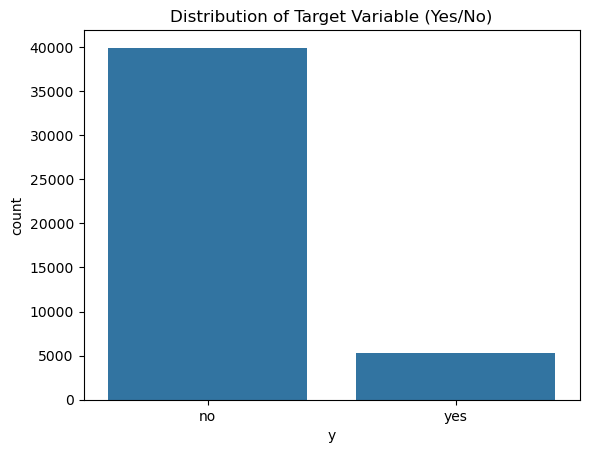

In [38]:
# We create a new figure to make sure other figures in the notebook don't get modified
plt.figure()

# Your code here
count_plot = sns.countplot(data=df, x='y')
plt.title('Distribution of Target Variable (Yes/No)')
# plt.xlabel('Class')
plt.ylabel('count')
plt.show()



**4. Make the same count, but this time segment the data by the variable marital status. What can you observe?**

*Hint: use the `hue` parameter in calling `sns.countplot()`*

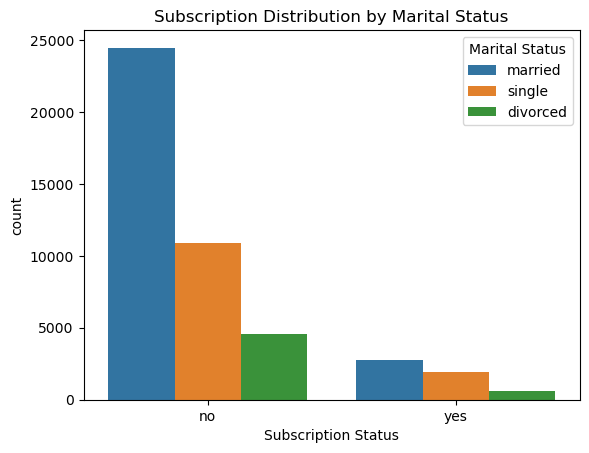

In [39]:
# We create a new figure to make sure other figures in the notebook don't get modified
plt.figure()

# Your code here
count_by_marital_status = sns.countplot(data=df, x='y', hue='marital')

plt.title('Subscription Distribution by Marital Status')
plt.xlabel('Subscription Status')
plt.ylabel('count')
plt.legend(title='Marital Status')
plt.show()


**5. Using `pandas`, create a boxplot of the balance variable. What can you conclude from the plot?**

*Hint: use the `.boxplot()` method from `pandas`*

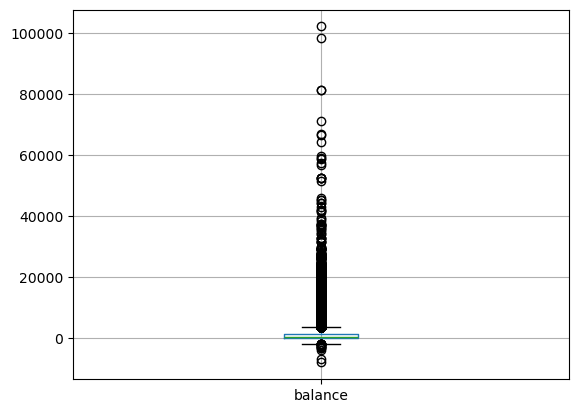

In [40]:
# We create a new figure to make sure other figures in the notebook don't get modified
plt.figure()

# Your code here
balance_boxplot = df.boxplot(column='balance')


**6. Plot the boxplot of the `balance` variable, grouped by the output variable `y`. What can you say concerning the distribution of the variable between the yes and no groups?**

Note that the `y` variable should be along the x-axis, and `balance` should be on the y-axis.

*Hint: use the `sns.boxplot()` function but specify both `x` and `y`*

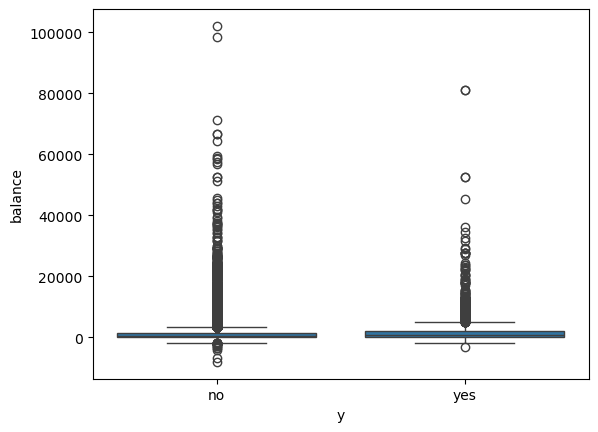

In [41]:
# We create a new figure to make sure other figures in the notebook don't get modified
plt.figure()

# Your code here:
balance_boxplot_grouped_by_y = sns.boxplot(data=df, y='balance', x='y')


# Dataset Preprocessing 

<br>

**7. The `duration` column is in seconds. Let's convert the units to be in minutes.**

Create a copy of the dataframe called `df_new` using the `.copy()` function. Do this to avoid overwriting the original one.


Convert the `duration` column to be in minutes, and save it in the duration column 

In [42]:
# Your code here
df_new = df.copy()
df_new['duration'] = df_new['duration'] / 60


**8. Convert the `job`, `education`, and `y` variables into suitable types for training a machine learning model**

First, create a copy of `df_new` called `df_numerical`. This will avoid overwriting the original DataFrame.


Next, to convert the categorical variables into a binary vector representation you can use the `pandas` function `get_dummies()`. This function can convert a numerical column into a categorical one. The function considers the possible categorical values that your feature can assume, and creates a vector of the length of the possible values, with 1 or 0 depending if that particular value is present or not. 


The `get_dummies()` function also accepts a `prefix` argument which specifies the prefix that will be added to the new variables. In this case, specify `job` for the job feature, and `education` for the education feature.


The `y` column initially contains `no` and `yes` values. These need to be converted into a binary representation (i.e. `0` and `1`). Overwrite the `y` column in `df_numerical` with the output of `get_dummies()`. Note, however, that this method will create two columns, which is redundant: to prevent this, pass `drop_first=True` to `get_dummies()`. 

Finally, concatenate the new variables to the `df_numerical` dataframe. 


In [43]:
# Your code here
# Create a copy of df_new to avoid overwriting the original DataFrame
df_numerical = df_new.copy()

# One-hot encode the 'job' and 'education' columns
job_dummies = pd.get_dummies(df_numerical['job'], prefix='job')
education_dummies = pd.get_dummies(df_numerical['education'], prefix='education')

# Convert the 'y' column to binary (0 and 1)
y_binary = pd.get_dummies(df_numerical['y'], drop_first=True)

# Add the binary 'y' column to df_numerical
df_numerical['y'] = y_binary

# Concatenate the one-hot encoded columns to df_numerical
df_numerical = pd.concat([df_numerical, job_dummies, education_dummies], axis=1)



**9. Make a new dataset with only `education_primary`, `education_secondary`, `education_tertiary`, `education_unknown`, `balance`, `duration`, `campaign`, `pdays`, `previous` and `y`.**

Create a new dataset from `df_numerical`, retaining only the columns `education_primary`, `education_secondary`, `education_tertiary`, `education_unknown`, `balance`, `duration`, `campaign`, `pdays`, `previous` and `y`. 

Save it in a new dataframe named `df_numerical_education`.

Remember to also use the `.copy()` method!

In [44]:
# Your code here
# Select the required columns for the new dataset
selected_columns = [
    'education_primary',
    'education_secondary',
    'education_tertiary',
    'education_unknown',
    'balance',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'y'
]

# Create a new DataFrame with the selected columns
df_numerical_education = df_numerical[selected_columns].copy()
df_numerical_education.head()


,education_primary,education_secondary,education_tertiary,education_unknown,balance,duration,campaign,pdays,previous,y
0,False,False,True,False,2143,4.350000,1,-1,0,False
1,False,True,False,False,29,2.516667,1,-1,0,False
2,False,True,False,False,2,1.266667,1,-1,0,False
3,False,False,False,True,1506,1.533333,1,-1,0,False
4,False,False,False,True,1,3.300000,1,-1,0,False


**10. Normalize the `df_numerical_education` dataset using min-max normalisation, and save it as a new variable called `df_scaled`.**

Given the dataset `df_numerical_education`, scale the values between the minimum and the maximum of the dataset, using.

The min max scaling formula (considering you want to scale between 0 and 1) is as follows: 

```Python
df_scaled=(originalDF - min_val_originalDF) / (max_val_originalDF - min_val_originalDF) 
```

In [45]:
# Normalize only the numeric columns in the `df_numerical_education` dataset using min-max normalization
numeric_cols = ['balance', 'duration', 'campaign', 'pdays', 'previous']

df_scaled = df_numerical_education.copy()
df_scaled[numeric_cols] = (df_scaled[numeric_cols] - df_scaled[numeric_cols].min()) / (df_scaled[numeric_cols].max() - df_scaled[numeric_cols].min())

# Fitting a logistic regression model 

**11. Divide the dataset into training and testing sets.**

Use the `train_test_split` from the `sklearn.model_selection` package to split the `df_scaled` dataframe into $4$ subsets: 
 - `X_train`
 - `X_test`
 - `y_train`
 - `y_test`

In doing so, specify the text size to be `0.3` and set the `random_state=101` for reproducibility.

In [46]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Define features and target variable using df_numerical_education
X = df_scaled
X = df_scaled.drop(columns=['y'])  # Exclude the target variable 'y' from features
y = df_numerical_education['y']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**12. Create a Logistic Regression model and fit it on the training data**

Assign your model to a variable called `logmodel`

*Hint: use the `.fit()` method*

In [47]:
# Create and fit a Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Initialize the model
logmodel = LogisticRegression()

# Fit the model on the training data
logmodel.fit(X_train, y_train)

LogisticRegression()

**13. Use the `.predict()` method from your model to generate predictions on `X_test`**

Assign the output to a variable called `predictions`.

In [48]:
# Generate predictions on the test set
predictions = logmodel.predict(X_test)

Once you have generated these predictions, uncomment the cell below to check out the accuracy score of your model. Think about what this metrics [means](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html). Is this a good model? Is `accuracy` a good metric?

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8901503981126512